Notice:

To store image in the dataframe, it can be done by downloading the image or sourcing the url of the image from original website. I did both in this project

In [5]:
#import the required package
import pandas as pd
import requests
import io
from PIL import Image
from IPython.display import HTML

In [8]:
#load the df to get info
df=pd.read_csv('~/2023summerb/2023summer/database/chem.csv')
df

cid                 cmpdname             mf  \
0     10184653                 Afatinib  C24H25ClFN5O3   
1       176871  Erlotinib hydrochloride   C22H24ClN3O4   
2    118607832             Mobocertinib     C32H39N7O4   
3       123631                Gefitinib  C22H24ClFN4O3   
4       176870                Erlotinib     C22H23N3O4   
..         ...                      ...            ...   
183  164517102               Egfr-IN-62     C30H33N9O2   
184  164887498               Egfr-IN-70  C31H36ClN5O5S   
185  164887603           Egfr/her2-IN-8    C16H16N4O2S   
186  165412706      Egfr/her2/dhfr-IN-1  C14H11BrN4O2S   
187  168264808            CID 168264808     C28H28FN7O   

                                             isosmiles  
0    CN(C)C/C=C/C(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=C...  
1    COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...  
2    CC(C)OC(=O)C1=CN=C(N=C1C2=CN(C3=CC=CC=C32)C)NC...  
3    COC1=C(C=C2C(=C1)N=CN=C2NC3=CC(=C(C=C3)F)Cl)OC...  
4    COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...  
..                                                 ...  
183  CN1C=C(C2=CC=CC=C21)C3=NC(=NC=C3)NC4=C(C=C(C(=...  
184  CCS(=O)(=O)N1C=C2C3=C1C=C(C=C3)OCCCCCCOC4=C(C=...  
185      CCC(=O)NNC(=O)C1=CSC2=NC=C(N12)C3=CC=C(C=C3)C  
186      CC(=O)NNC(=O)C1=CSC2=NC=C(N12)C3=CC=C(C=C3)Br  
187  CN1CCN(CC1)C2=CC=C(C=C2)NC3=NC4=C(C=C(C=C4)F)C...  

[188 rows x 4 columns]

In [3]:
#download the images and save to the current directory 
for cid in df['cid']:
    url=f'https://pubchem.ncbi.nlm.nih.gov/image/imgsrv.fcgi?&cid={cid}&t=l'
    image_content=requests.get(url,stream=True).content
    
    image_file=io.BytesIO(image_content)
    image=Image.open(image_file)
    #convert format to be saved in image_folder
    if image.mode != 'RGB':
        image = image.convert('RGB')
    #save to the image_folder
    
    with open(str(cid)+'.jpg','wb') as file:
        image.save(file,"JPEG")
##yeah yeah it succeed!    

### store image in a list and add to the dataframe[use the downloaded image]

In [16]:
image_list=[]
for cid in df['cid']:
    file_name=f'<img src="{cid}.jpg">'
    image_list.append(file_name) 
df['2D-Structure']=image_list
HTML(df.to_html(escape=False))

### Or I can use the url (without downloading)

In [17]:
df_copy=df.copy()
image_list=[]
for cid in df['cid']:
    file_name=f'<img src="https://pubchem.ncbi.nlm.nih.gov/image/imgsrv.fcgi?&cid={cid}&t=l">'
    image_list.append(file_name) 
df_copy['2D-Structure']=image_list
HTML(df_copy.to_html(escape=False))

In [20]:
HTML(df_copy[['cid','2D-Structure']].to_html(escape=False))

#### convert to csv

In [18]:
df_copy.to_csv("with_image.csv",index=False)

### 3D Structure

I decided not to embed 3D version to the dataframe for the low resolution when 3D convert to 2D picture.  

In [3]:
##file_name='<img src="https://pubchem.ncbi.nlm.nih.gov/image/img3d.cgi?&cid=176870&t=s">'

In [16]:
df_copy=df.copy()
image_list=[]
for cid in df_copy['cid']:
    file_name=f'<img src="https://pubchem.ncbi.nlm.nih.gov/image/img3d.cgi?&cid={cid}&t=s">'
    image_list.append(file_name) 
df_copy['3D-Structure']=image_list
HTML(df_copy[['3D-Structure']].to_html(escape=False))

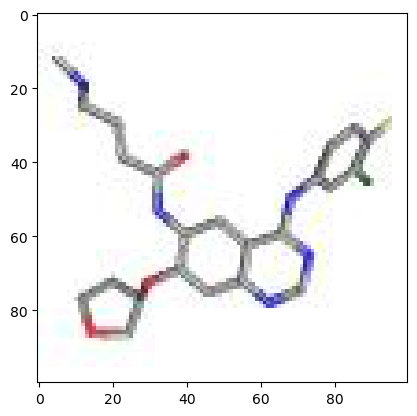

In [28]:
img=mpim.imread('photo.jpg')
implot=plt.imshow(img)
plt.show()